In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
#import matplotlib.animation as animation

In [25]:
# Definition of constants
G = 9.82  # acceleration due to gravity, in m/s^2
M1 = 1.0  # mass of pendulum 1 in kg
Cl = 0.5
Cq = 0.5


# Definition of derivatives for free fall
def derivs_free(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -G

    return dydx

# Definition of derivatives for fall with linear damping
def derivs_ld(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -G - Cl * state[1]

    return dydx

# Definition of derivatives for fall with quadratic damping
def derivs_qd(state, t):
    # state[0]=x;state[1]=v
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    dydx[1] = -G + Cq * state[1]*state[1]

    return dydx




In [24]:
# create a time array for the motions
start_time=0
stop_time=15
dt = 0.01
t = np.arange(start_time, stop_time, dt)

# initial state x0=1, v0=0
x0 = 1.0
v0 = 0.0

In [26]:
# Free fall example

# Set initial state
state = np.array([x0, v0])

# integrate the ODE using scipy.integrate.
y = integrate.odeint(derivs_free, state, t)

x_free = y[:, 0]

v_free = y[:, 1]



In [27]:
# Linear damping  example

# Set initial state
state = np.array([x0, v0])

# Integrate the ODE using scipy.integrate.
y2 = integrate.odeint(derivs_ld, state, t)

x_ld = y2[:, 0]

v_ld = y2[:, 1]


In [28]:
# Quadratic damping example

# Set initial state
state = np.array([x0, v0])
#print(state)

# Integrate your ODE using scipy.integrate.
y3 = integrate.odeint(derivs_qd, state, t)

x_qd = y3[:, 0]

v_qd = y3[:, 1]



In [39]:
# Get the acceleration as the derivative of the velocity
a_free=np.gradient(v_free)
a_ld=np.gradient(v_ld)
a_qd=np.gradient(v_qd)

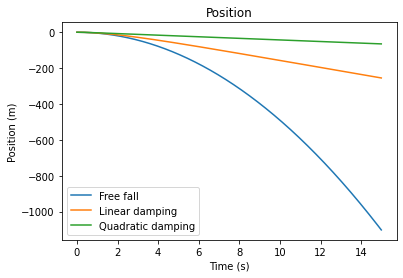

In [40]:
fix, ax = plt.subplots()

plt.title("Position")
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

ax.plot(t,x_free,label='Free fall')
ax.plot(t,x_ld,label='Linear damping')
ax.plot(t,x_qd,label='Quadratic damping')
ax.legend()
plt.show()



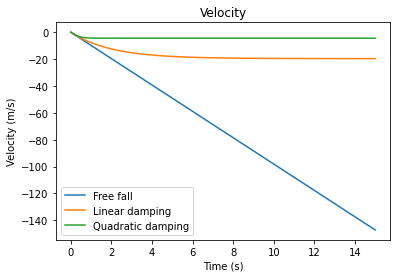

In [41]:
fix, ax = plt.subplots()

plt.title("Velocity")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')


ax.plot(t,v_free,label='Free fall')
ax.plot(t,v_ld,label='Linear damping')
ax.plot(t,v_qd,label='Quadratic damping')
ax.legend()
plt.show()



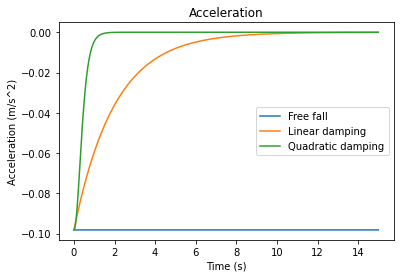

In [42]:
fix, ax = plt.subplots()

plt.title("Acceleration")
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')


ax.plot(t,a_free,label='Free fall')
ax.plot(t,a_ld,label='Linear damping')
ax.plot(t,a_qd,label='Quadratic damping')
ax.legend()
plt.show()



In [70]:
# Find zero acceleration cases by thresholding
ti_term_ld=np.where(np.abs(a_ld)<1e-4)[0][0]
v_term_ld=v_ld[ti_term_ld]
ti_term_qd=np.where(np.abs(a_qd)<1e-4)[0][0]
v_term_qd=v_qd[ti_term_qd]

print('Terminal velocity for linear damping:    %5.2f m/s at time:  %5.2f s\n'%(v_term_ld,t[ti_term_ld]))
print('Terminal velocity for quadratic damping: %5.2f m/s at time:  %5.2f s'%(v_term_qd,t[ti_term_qd]))

Terminal velocity for linear damping:    -19.62 m/s at time:  13.78 s

Terminal velocity for quadratic damping: -4.43 m/s at time:   1.87 s
